In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [2]:
df = pd.read_csv('Heart_Failure_Data.csv')
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.dtypes

Age                 int64
Gender             object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
# checking if there are any null values present in the dataset
df.isnull()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
 # Calculating if any missing values are present
missing_values = df.isnull().sum()
print(missing_values)

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### **Categorical Encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])

In [8]:
df['Gender']=df['Gender'].map({'F': 1, 'M':0 })

In [9]:
df['ExerciseAngina']=df['ExerciseAngina'].map({'N':0, 'Y': 1})

In [10]:
col = ['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
df


,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,2,0
1,49,1,2,160,180,0,1,156,0,1.0,1,1
2,37,0,1,130,283,0,2,98,0,0.0,2,0
3,48,1,0,138,214,0,1,108,1,1.5,1,1
4,54,0,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,1,132,0,1.2,1,1
914,68,0,0,144,193,1,1,141,0,3.4,1,1
915,57,0,0,130,131,0,1,115,1,1.2,1,1
916,57,1,1,130,236,0,0,174,0,0.0,1,1


In [50]:
# From this corr matrix we come to know that ExerciseAngina has good correlation with HeartDisease
df.corr()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Gender,-0.055750,1.000000,0.126559,-0.005133,0.200092,-0.120076,-0.071552,0.189186,-0.190664,-0.105734,0.150693,-0.305445
ChestPainType,-0.077150,0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,-0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,-0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,-0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,-0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: >

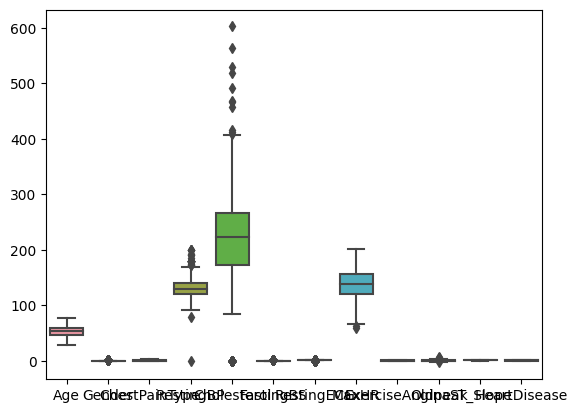

In [11]:
#Checking for Outliers
sns.boxplot(df)

<Axes: >

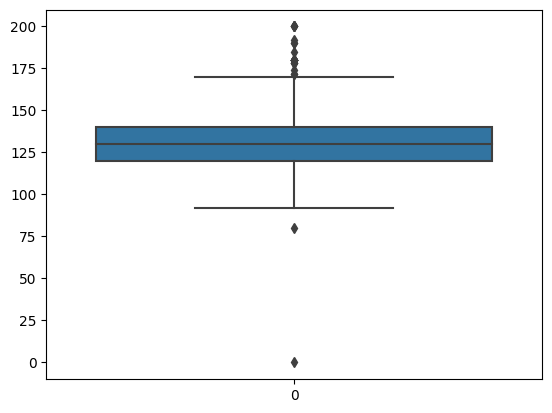

In [12]:
# Removing outliers for RestingBP column
sns.boxplot(df['RestingBP'])

In [13]:
# Finding iqr
per25 = df['RestingBP'].quantile(0.25)
per75 = df['RestingBP'].quantile(0.75)
iqr = per75 - per25
print(iqr)

20.0


In [14]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 - 1.5*iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)


Upper limit: 170.0
Lower limit: 90.0


<Axes: >

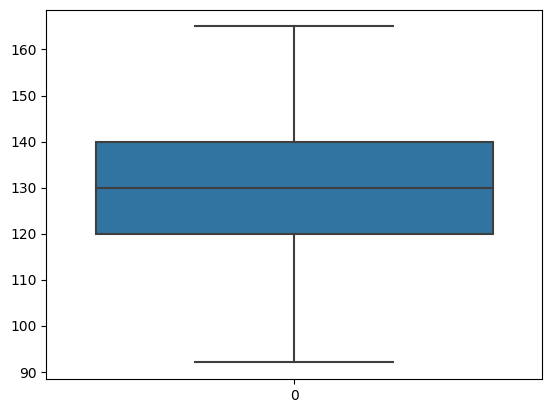

In [15]:
df1 = df[ (df['RestingBP'] < upper_limit) & (df['RestingBP'] >lower_limit)]
sns.boxplot(df1['RestingBP'])


In [16]:
# Removing outliers for Cholesterol column
# Finding iqr
per25 = df['Cholesterol'].quantile(0.25)
per75 = df['Cholesterol'].quantile(0.75)
iqr = per75 - per25
print(iqr)

93.75


In [17]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 - 1.5*iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)


Upper limit: 407.625
Lower limit: 32.625


In [18]:
df1 = df[ (df['Cholesterol'] < upper_limit) & (df['Cholesterol'] >lower_limit)]

In [19]:
# Removing outliers for MaxHR
per25 = df['MaxHR'].quantile(0.25)
per75 = df['MaxHR'].quantile(0.75)
iqr = per75 - per25
print(iqr)

36.0


In [20]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 - 1.5*iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Upper limit: 210.0
Lower limit: 66.0


In [21]:
df1 = df[ (df['MaxHR'] < upper_limit) & (df['MaxHR'] > lower_limit)]

In [22]:
#Removing outliers from Oldpeak column
per25 = df['Oldpeak'].quantile(0.25)
per75 = df['Oldpeak'].quantile(0.75)
iqr = per75 - per25
print(iqr)

1.5


In [23]:
upper_limit = per75 + 1.5*iqr
lower_limit = per25 - 1.5*iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Upper limit: 3.75
Lower limit: -2.25


In [24]:
df1 = df[ (df['Oldpeak'] < upper_limit) & (df['Oldpeak'] > lower_limit)]

Independent & Dependent variable

In [25]:
X = df1.iloc[:, :-1].values   #selecting independent variable
Y = df1.iloc[:,-1].values        #selecting dependent variable

Training and testing the data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### **Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

#The model learns to map input features(X_train) to the target labels(Y_train) during the training process.

LogisticRegression()

In [29]:
#Applying the predictions on testing data
Y_pred = classifier.predict(X_test)

Evaluation of Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix: \n", cm)

Confusion matrix: 
 [[ 84  27]
 [ 15 100]]


In [31]:
#Checking the accuracy of classification model's predictions
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)
#Comparing predicted lables(Y_pred) to true labels(Y_test) to compute the accuracy

0.8141592920353983

Kfold

In [32]:
from sklearn.model_selection import KFold
k = KFold(n_splits=10)

In [33]:
for train, test in k.split([1,2,3,4,5,6,7,8,9,0]):
 print(train,test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [34]:
from sklearn.model_selection import cross_val_score  #cross_val_score is used to observe cross validation score
accuries = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv=10)  #cv=10 indicates that we want to use 10-fold cross-validation.
print(accuries)
print(accuries.mean())

[0.83823529 0.86764706 0.82352941 0.83823529 0.92647059 0.88235294
 0.89552239 0.80597015 0.89552239 0.79104478]
0.8564530289727831


### **KNN**

In [35]:
#The optimal value of 'k' is typically chosen to be the square root of the number of data points in the test set.
# Finding appropriate 'k' value
import math
math.sqrt(len(Y_test))

15.033296378372908

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

In [37]:
Y_pred = knn.predict(X_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1])

In [38]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1_score = f1_score(Y_test, Y_pred)

print("Confusion Matrix:\n ", cm)
print("Accurcay score: ", accuracy)
print("Precision Score: ", precision)
print("F1_score:", f1_score )

Confusion Matrix:
  [[ 90  21]
 [ 13 102]]
Accurcay score:  0.8495575221238938
Precision Score:  0.8292682926829268
F1_score: 0.857142857142857


### **Importing SVM(Support Vector Machine) on the model**

In [39]:
from sklearn.svm import SVC   #SVC stands for Support Vector Classification
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [40]:
Y_pred = classifier.predict(X_test)  #predicting the results after training the model
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1])

In [41]:
# For kernel = poly #The polynomial kernel is used as "poly" to map data into a higher-dimensional feature
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)
acc=accuracy_score(Y_test,Y_pred)
print(acc)

0.831858407079646


In [42]:
# For kernal = sigmoid
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid', random_state=0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)
acc=accuracy_score(Y_test,Y_pred)
print(acc)

0.8008849557522124


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)


print("Confusion Matrix: \n", cm)
print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix: 
 [[ 79  32]
 [ 13 102]]
Accuracy Score: 0.8008849557522124
Precision: 0.7611940298507462
Recall: 0.8869565217391304


### **Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state=3)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [45]:
Y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)


print("Confusion Matrix: \n", cm)
print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix: 
 [[85 26]
 [19 96]]
Accuracy Score: 0.8008849557522124
Precision: 0.7868852459016393
Recall: 0.8347826086956521


### **Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(criterion='entropy', n_estimators= 50, random_state=42)
random.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [48]:
Y_pred = random.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)


print("Confusion Matrix: \n", cm)
print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix: 
 [[ 89  22]
 [ 12 103]]
Accuracy Score: 0.8495575221238938
Precision: 0.824
Recall: 0.8956521739130435
